In [62]:
%matplotlib inline
import pandas as pd

In [63]:
titles = pd.read_csv('data/titles.csv')
titles = titles[titles['year'] <= 2015]
titles.head()

,title,year
0,Berlian si Etty,2013
1,The Mighty,1929
2,Little Black Spiders,2012
3,Twelve O'Clock High,1949
4,D4,2011


In [64]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Natas es Satan,1977,Ramon 'Cartucho' Pena,actor,Nigth Club Owner,NaN
2,Los tarantos,1963,'El Guisa',actor,Bailaor,25.0
3,Los tarantos,1963,'El Viti',actor,Cantaor,20.0
4,Been Down So Long It Looks Like Up to Me,1971,Murray the 'K',actor,Himself,NaN


### What are the ten most common movie names of all time?

In [85]:
h=titles
h=h.title.value_counts()
h=h.reset_index()
h.columns = ['name','number']
h.sort_values(['number','name'], ascending=[False, True]).head(10)

,name,number
0,Hamlet,18
1,Carmen,15
2,Macbeth,14
3,Honeymoon,11
5,Maya,11
7,Othello,11
4,Temptation,11
6,The Three Musketeers,11
8,Anna Karenina,10
10,Kismet,10


### What are the names of movies appeared more than 10 times in film history?

In [51]:
h=titles
h=h.title.value_counts()
h[h>10]

Hamlet                  18
Carmen                  15
Macbeth                 14
Honeymoon               11
Temptation              11
Maya                    11
The Three Musketeers    11
Othello                 11
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [10]:
h=titles
h[h.year//10 == 193].year.value_counts().head(3)

1937    1208
1936    1150
1938    1147
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

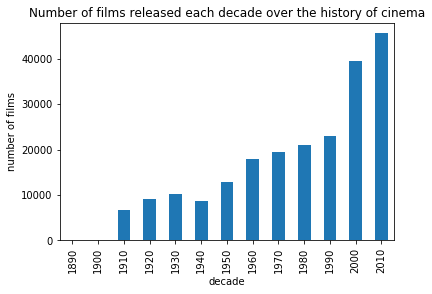

In [22]:
h=titles
x=h.year // 10 * 10
ax = x.value_counts().sort_index().plot(kind='bar', title = 'Number of films released each decade over the history of cinema')
ax.set(xlabel="decade", ylabel="number of films");

### Plot the number of "Hamlet" films made each decade.

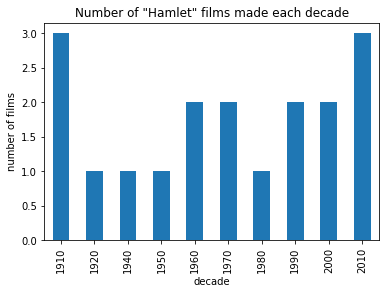

In [23]:
h=titles
h=h[h.title=='Hamlet']
x=h.year // 10 * 10
ax = x.value_counts().sort_index().plot(kind='bar')
ax.set(xlabel="decade", ylabel="number of films", title = 'Number of "Hamlet" films made each decade');

### Plot the number of "Rustler" characters in each decade of the history of film.

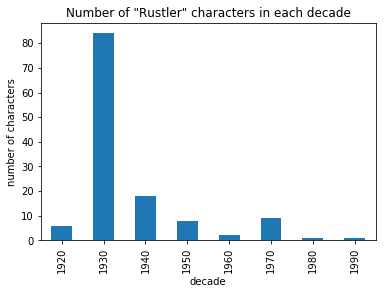

In [25]:
h=cast
h=h[h.character=='Rustler']
x=h.year // 10 * 10
ax = x.value_counts().sort_index().plot(kind='bar')
ax.set(xlabel="decade", ylabel="number of characters", title = 'Number of "Rustler" characters in each decade');

### Plot the number of "Hamlet" characters each decade.

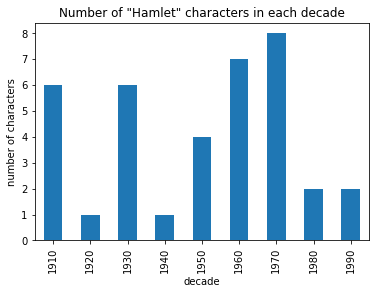

In [26]:
h=cast
h=h[h.character=='Hamlet']
x=h.year // 10 * 10
ax = x.value_counts().sort_index().plot(kind='bar')
ax.set(xlabel="decade", ylabel="number of characters", title = 'Number of "Hamlet" characters in each decade');

### What are the 11 most common character names in movie history?

In [15]:
h=cast
h.character.value_counts().head(11)

Minor Role     6278
Dancer         5954
Townsman       5785
Himself        5399
Reporter       4616
Policeman      4416
Henchman       4401
Party Guest    3909
Doctor         3467
Waiter         2960
Barfly         2729
Name: character, dtype: int64

### Who are the people credited as "Herself" more than 3 times in film history?

In [46]:
h=cast
h=h[h.character=='Herself']
h=h.name.value_counts()
h[h>3]

Queen Elizabeth II    8
Joyce Brothers        5
Bunny Yeager          5
Josephine Baker       4
Inday Badiday         4
Sarah Vaughan         4
Lily Morris           4
Marilyn Monroe        4
Bessie Love           4
Rekha                 4
Minnie Pearl          4
Eve Becke             4
Mary Pickford         4
Name: name, dtype: int64

### Who are the people credited as "Himself" more than 10 times in film history?

In [53]:
h=cast
h=h[h.character=='Himself']
h=h.name.value_counts()
h[h>10]

Adolf Hitler             60
Richard Nixon            15
Winston Churchill        15
Franklin D. Roosevelt    14
Benito Mussolini         12
Billy Graham             11
Joe Louis                11
Name: name, dtype: int64

### Which actors or actresses appeared in more than 25 movies in the year 1945?

In [55]:
h=cast
h=h[h.year == 1945]
h=h.name.value_counts()
h[h>25]

Emmett Vogan       39
Sam (II) Harris    33
Harold Miller      29
Bess Flowers       29
Frank O'Connor     27
Franklyn Farnum    27
Nolan Leary        27
Name: name, dtype: int64

### Which actors or actresses appeared in more than 15 movies in the year 1985?

In [56]:
h=cast
h=h[h.year == 1985]
h=h.name.value_counts()
h[h>15]

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

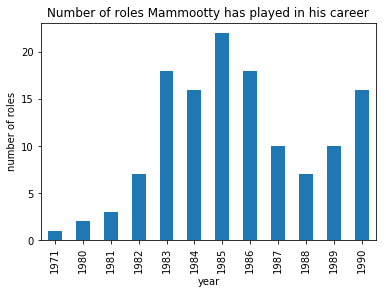

In [31]:
h=cast
h=h[h.name == 'Mammootty']
ax = h.year.value_counts().sort_index().plot(kind='bar')
ax.set(xlabel="year", ylabel="number of roles", title = 'Number of roles Mammootty has played in his career');

### What are the roles that start with the phrase "Patron in" and have appeared more than once in film history?

In [44]:
h=cast
h=h[h.character.str.startswith('Patron in')]
h = h.character.value_counts()
h[h>1]

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in cabaret                3
Patron in Bar                    2
Name: character, dtype: int64

### What are the roles that start with the word "Science" and have appeared more than once in film history?

In [45]:
h=cast
h=h[h.character.str.startswith('Science')]
h=h.character.value_counts()
h[h>1]

Science Teacher        10
Science Club Member     5
Science teacher         2
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

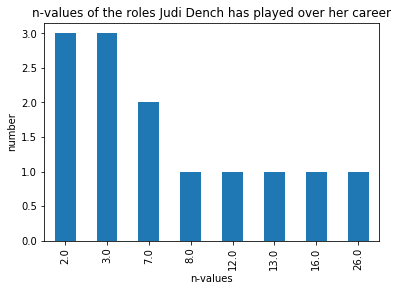

In [41]:
ax = cast[cast.name == 'Judi Dench'].n.value_counts().sort_index().plot(kind='bar')
ax.set(xlabel="n-values", ylabel="number", title = 'n-values of the roles Judi Dench has played over her career');

### Plot the n-values of Cary Grant's roles through his career.

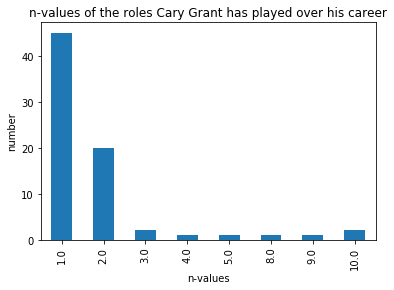

In [36]:
h=cast
ax = h[h.name == 'Cary Grant'].groupby('n').size().plot(kind='bar')
ax.set(xlabel="n-values", ylabel="number", title = 'n-values of the roles Cary Grant has played over his career');

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

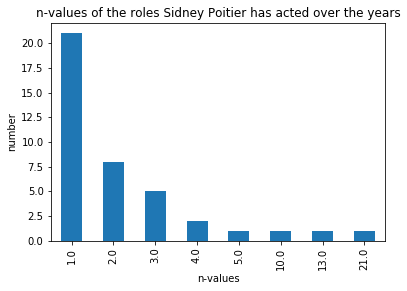

In [42]:
h=cast
ax = h[h.name == 'Sidney Poitier'].n.value_counts().sort_index().plot(kind='bar')
ax.set(xlabel="n-values", ylabel="number", title = 'n-values of the roles Sidney Poitier has acted over the years');

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [28]:
h=cast
h=h[(h.n==1) & (h.year//10==195)]
h.type.value_counts()

actor      6694
actress    3036
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [29]:
h=cast
h=h[(h.n==2) & (h.year//10==195)]
h.type.value_counts()

actor      4641
actress    4632
Name: type, dtype: int64